In [5]:
import pandas as pd
import pickle

# Visualization libraries
import matplotlib.pyplot as plt
import plotly.express as px

# Machine learning models
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Machine learning utilities
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score, classification_report
# from yellowbrick.classifier import ClassificationReport
from sklearn.preprocessing import LabelEncoder
# from yellowbrick.classifier import ConfusionMatrix
from sklearn.pipeline import Pipeline

In [6]:
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/sms.tsv"
df = pd.read_csv(url, delimiter='\t', header=None, names=['label', 'message'])

In [7]:
df

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [9]:
label_dist = df['label'].value_counts()
label_dist

label
ham     4825
spam     747
Name: count, dtype: int64

In [13]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

label      0
message    0
dtype: int64


In [15]:
dup_counts = df.pivot_table(index=['label', 'message'], aggfunc='size')

In [17]:
print(dup_counts)

label  message                                                                                                                                                                     
ham     &lt;#&gt;  in mca. But not conform.                                                                                                                                            1
        &lt;#&gt;  mins but i had to stop somewhere first.                                                                                                                             1
        &lt;DECIMAL&gt; m but its not a common car here so its better to buy from china or asia. Or if i find it less expensive. I.ll holla                                            1
        and  picking them up from various points                                                                                                                                       1
        came to look at the flat, seems ok, in his 50s? * Is away alot wiv work.

In [19]:
# identify the duplicated rows based on all columns
dups = df.duplicated()

# count the number of duplicated rows
dup_count = dups.sum()

In [21]:
dup_count

403

In [25]:
#drop duplicates
df_filtered = df.drop_duplicates()

In [27]:
df_filtered

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


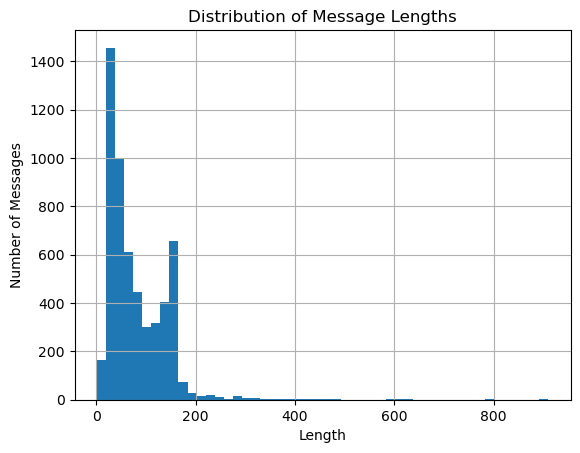

In [29]:
# Distribution of message lengths
df['text_length'] = df['message'].apply(len)
df['text_length'].hist(bins=50)
plt.title('Distribution of Message Lengths')
plt.xlabel('Length')
plt.ylabel('Number of Messages')
plt.show()

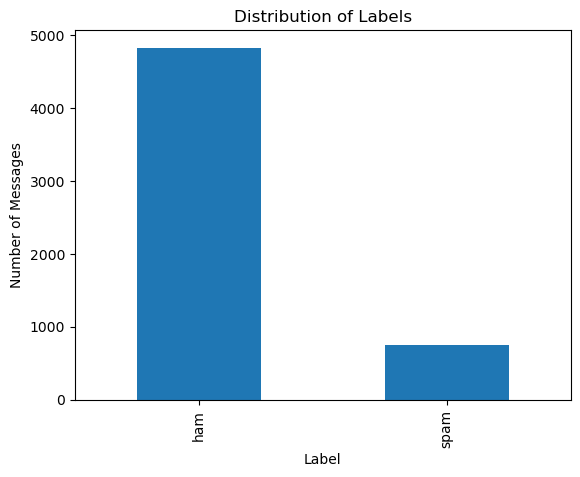

In [31]:
# Breakdown of "spam" vs "ham" labels
label_dist.plot(kind='bar')
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Number of Messages')
plt.show()

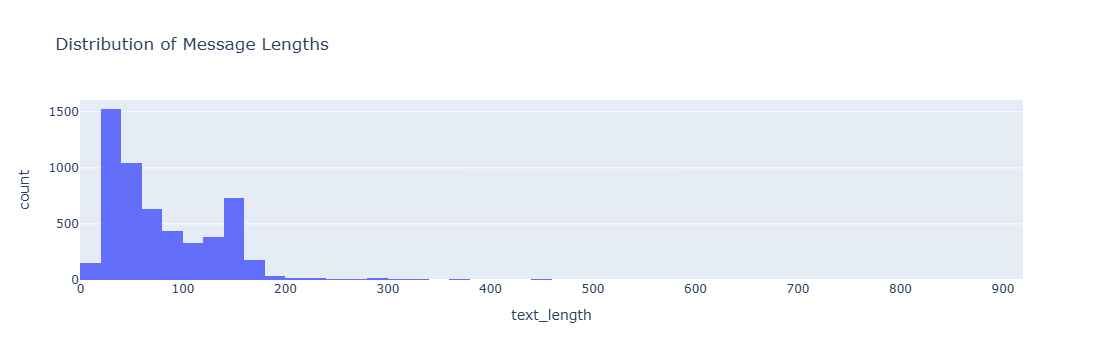

In [35]:
# Histogram using Plotly
fig_length = px.histogram(df, x='text_length', title='Distribution of Message Lengths', nbins=50)
fig_length.show()

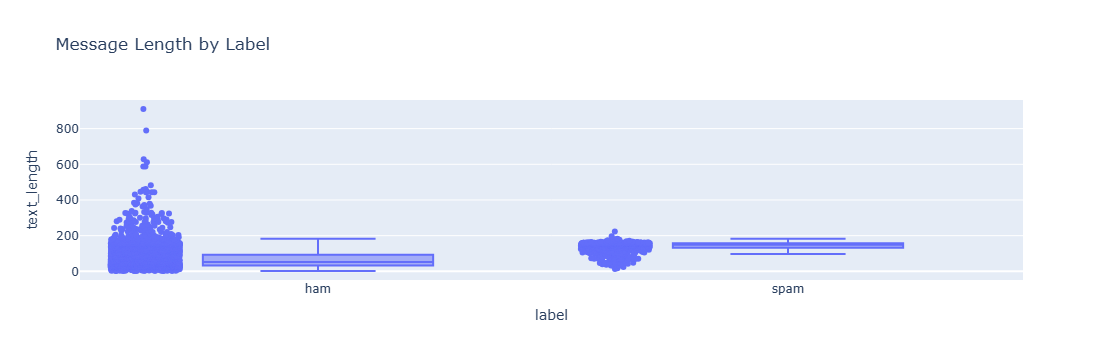

In [37]:
# Box plot using Plotly
fig_box = px.box(df, x='label', y='text_length', points="all", title="Message Length by Label")
fig_box.show()

(array([4825.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         747.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

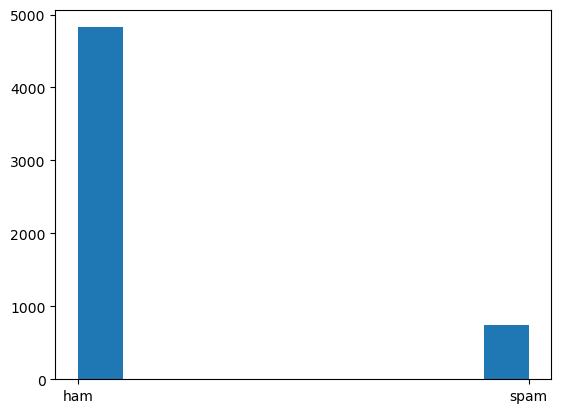

In [43]:
plt.hist(df['label'])

In [50]:
ham_messages = df[df['label']=='ham']

In [52]:
ham_messages

,label,message,text_length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
6,ham,Even my brother is not like to speak with me. ...,77
...,...,...,...
5565,ham,Huh y lei...,12
5568,ham,Will ü b going to esplanade fr home?,36
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


C:\Users\vanes\AppData\Local\Temp\ipykernel_38160\969553574.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



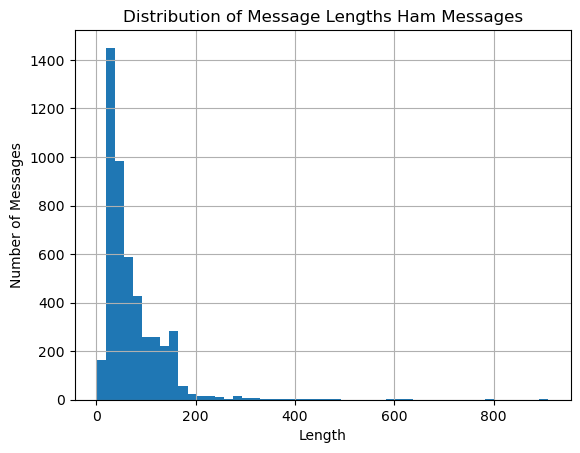

In [58]:
# Distribution of message lengths
ham_messages['text_length'] = ham_messages['message'].apply(len)
ham_messages['text_length'].hist(bins=50)
plt.title('Distribution of Message Lengths Ham Messages')
plt.xlabel('Length')
plt.ylabel('Number of Messages')
plt.show()

In [68]:
spam_messages = df[df['label']=='spam']

In [70]:
spam_messages

,label,message,text_length
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147
8,spam,WINNER!! As a valued network customer you have...,157
9,spam,Had your mobile 11 months or more? U R entitle...,154
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136
...,...,...,...
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158
5547,spam,Had your contract mobile 11 Mnths? Latest Moto...,160
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147


C:\Users\vanes\AppData\Local\Temp\ipykernel_38160\2906633124.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



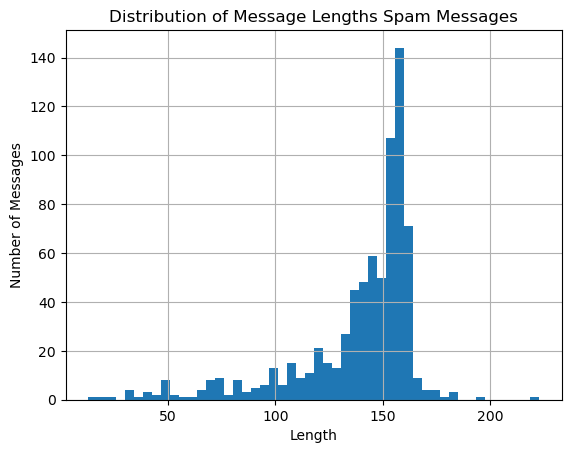

In [76]:
# Distribution of message lengths
spam_messages['text_length'] = spam_messages['message'].apply(len)
spam_messages['text_length'].hist(bins=50)
plt.title('Distribution of Message Lengths Spam Messages')
plt.xlabel('Length')
plt.ylabel('Number of Messages')
plt.show()

In [ ]:
## Spam messages had a longer average text length compared to Ham messages

In [78]:
df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})


In [80]:
df.head()

,label,message,text_length,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",111,0
1,ham,Ok lar... Joking wif u oni...,29,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,1
3,ham,U dun say so early hor... U c already then say...,49,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,0


In [82]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.2, random_state=42)

In [84]:
# Using CountVectorizer to transform our text data
vectorizer = CountVectorizer(stop_words='english')
X_train_transformed = vectorizer.fit_transform(X_train)
X_test_transformed = vectorizer.transform(X_test)

# Train a Naive Bayes model
clf = MultinomialNB()

In [86]:
# This one line of code is where the machine learning happens
clf.fit(X_train_transformed, y_train)

MultinomialNB()

In [88]:
# Making predictions
y_pred = clf.predict(X_test_transformed)

# Evaluating our model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       966
        spam       0.97      0.95      0.96       149

    accuracy                           0.99      1115
   macro avg       0.98      0.97      0.97      1115
weighted avg       0.99      0.99      0.99      1115



In [90]:
# Using TfidfVectorizer
vectorizer_tfidf = TfidfVectorizer(stop_words='english')
X_train_transformed_tfidf = vectorizer_tfidf.fit_transform(X_train)
X_test_transformed_tfidf = vectorizer_tfidf.transform(X_test)

# Comparing different models: Naive Bayes, Random Forest, and Logistic Regression
models = [
    ('Naive Bayes', MultinomialNB()),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Logistic Regression', LogisticRegression(random_state=42))
]

best_f1 = 0
best_model_name = ''
best_model = None

for name, model in models:
    model.fit(X_train_transformed_tfidf, y_train)
    y_pred = model.predict(X_test_transformed_tfidf)
    
    # Display results
    print(f"Results for {name}")
    
    # Output formatted for printing
    print(classification_report(y_test, y_pred, output_dict=False))
    print("------------------------------")
    
    # Determine if this model has the highest F1 score
    report = classification_report(y_test, y_pred, output_dict=True) # output formatted as a dict this time
    f1 = report['weighted avg']['f1-score']
    if f1 > best_f1:
        best_f1 = f1
        best_model_name = name
        best_model = model

# Save the best model to disk using pickle
filename = 'best_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(best_model, file)

print(f"The best model is {best_model_name} with F1 score of {best_f1:.2f}. Model saved as {filename}.")

# # Also save the vectorizer, which is already fitted to our training data
with open('tfidf_vectorizer.pkl', 'wb') as file:
    pickle.dump(vectorizer_tfidf, file)

Results for Naive Bayes
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       966
        spam       1.00      0.84      0.91       149

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115

------------------------------
Results for Random Forest
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       966
        spam       1.00      0.86      0.92       149

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.96      1115
weighted avg       0.98      0.98      0.98      1115

------------------------------
Results for Logistic Regression
              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       966
        spam       1.00      0.77      0.87       149

    accuracy                          

In [96]:
from sklearn.naive_bayes import GaussianNB 
clf = GaussianNB()


In [110]:
from sklearn.cross_validation import KFold, cross_val_score
k_fold = KFold(len(y), n_folds=10, shuffle=True, random_state=0)
clf = GaussianNB()


ModuleNotFoundError: No module named 'sklearn.cross_validation'

In [100]:
clf = GaussianNB()
clf.fit(X, Y)
GaussianNB()
print(clf.predict([[-0.8, -1]]))

clf_pf = GaussianNB()
clf_pf.partial_fit(X, Y, np.unique(Y))

print(clf_pf.predict([[-0.8, -1]]))
clf_scores = cross_val_score(clf, X, y, cv=10) 
print('Naive Bayes score: %0.3f' % clf_scores.mean())

NameError: name 'cross_val_score' is not defined

In [112]:
def visualize_model(X_train, y_train, X_test, y_test, model_name, estimator):
    """
    Visualize performance of an estimator using Yellowbrick's ClassificationReport.
    """
    # Ensure labels are properly encoded
    y_train_encoded = LabelEncoder().fit_transform(y_train)
    y_test_encoded = LabelEncoder().fit_transform(y_test)
    
    # Create a pipeline with TfidfVectorizer and the estimator
    model = Pipeline([
        ('tfidf', TfidfVectorizer(stop_words='english')),
        ('estimator', estimator)
    ])

    # Instantiate the classification model and visualizer
    visualizer = ClassificationReport(
        model, classes=['ham', 'spam'],
        cmap="YlGn", size=(600, 360)
    )
    visualizer.fit(X_train, y_train_encoded)
    visualizer.score(X_test, y_test_encoded)
    visualizer.show(title=f"Classification Report for {model_name}")

# Loop over each model and visualize
for name, model in models:
    visualize_model(X_train, y_train, X_test, y_test, name, model)

NameError: name 'ClassificationReport' is not defined